# DATASET PREPROCESSING

Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Loading Dataset

In [4]:
df=pd.read_csv('Algerian_forest_fires_cleaned.csv')

In [5]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Generating summary of the dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


Generating descriptive analysis of the columns

In [7]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


Detecting any missing values

In [8]:
df.isna().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


Removing duplicates if any

In [9]:
df.drop_duplicates(inplace=True)


Checking out unique values for target variable. Observed there are many unique values for only two classes because of white space

In [10]:
print(df['Classes'].unique())


['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire '
 'not fire     ' 'not fire    ']


Removing white space and checking again for unique values for confirmation of removal of white space

In [11]:
df['Classes'] = df['Classes'].str.strip()
print(df['Classes'].unique())

['not fire' 'fire']


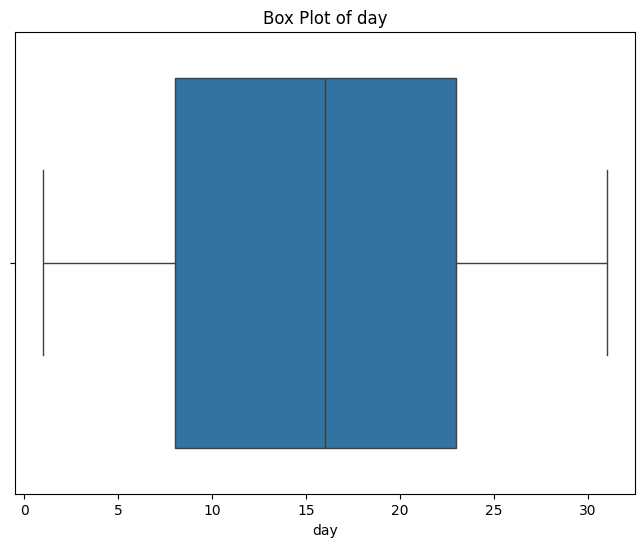

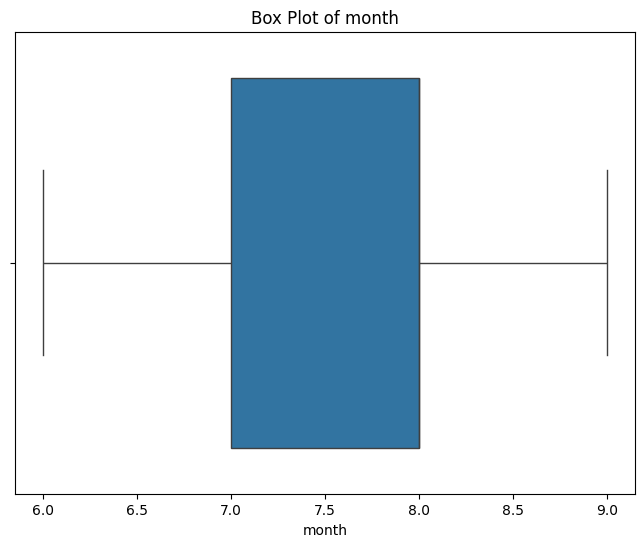

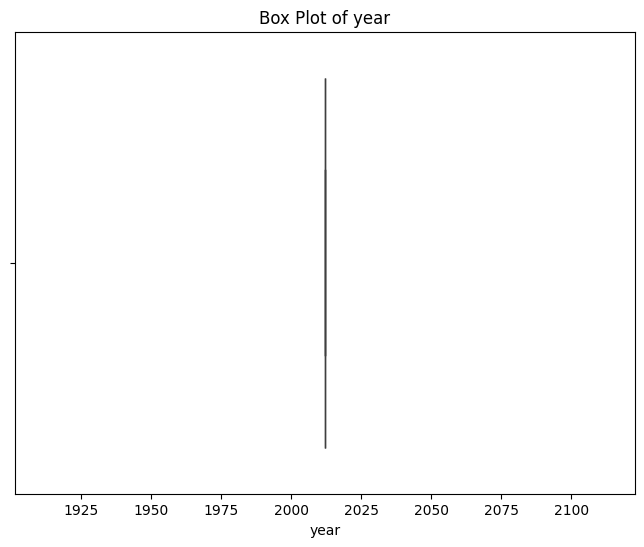

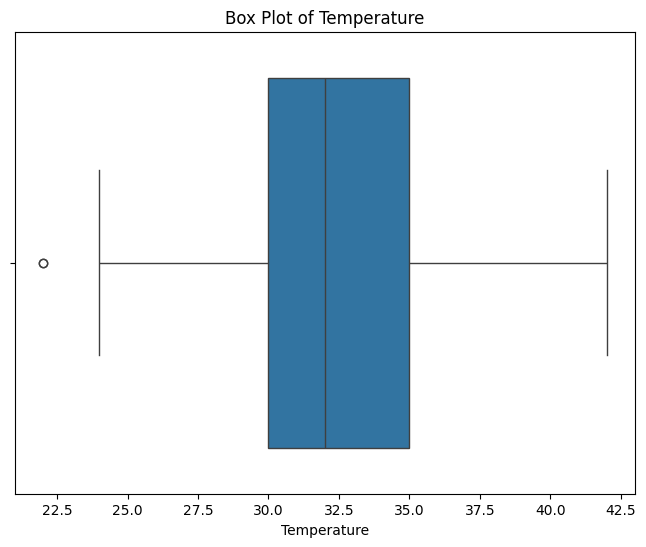

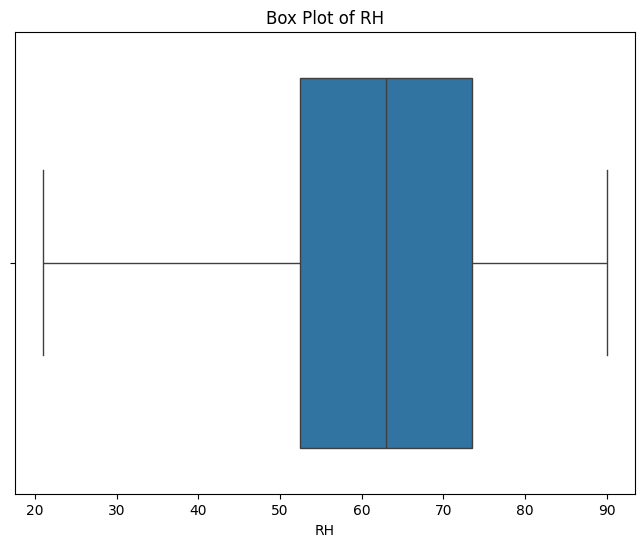

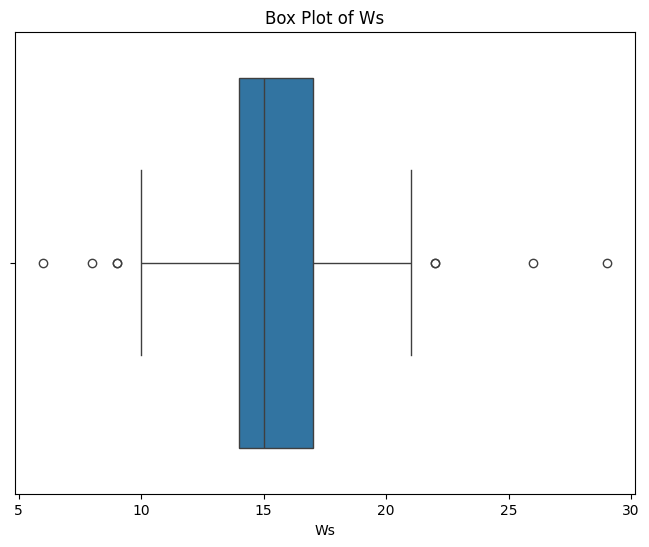

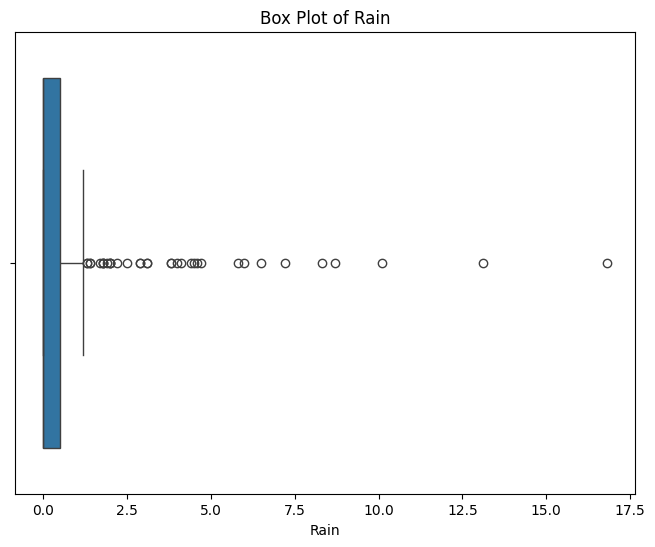

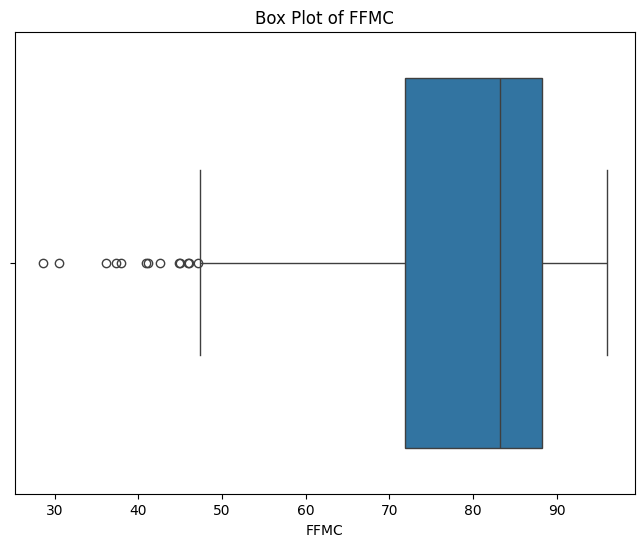

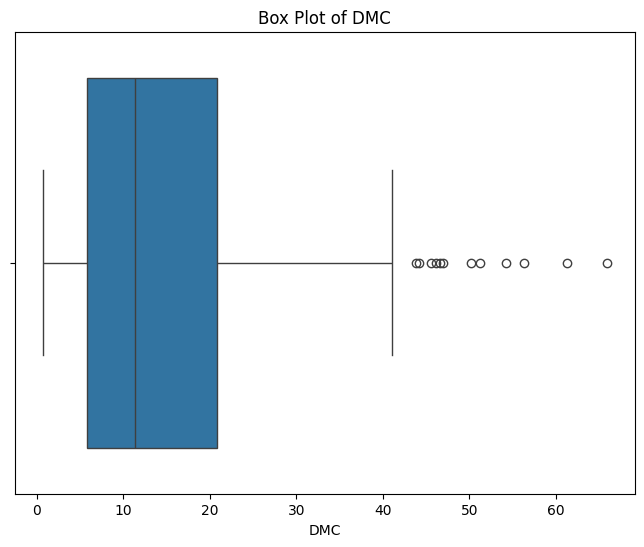

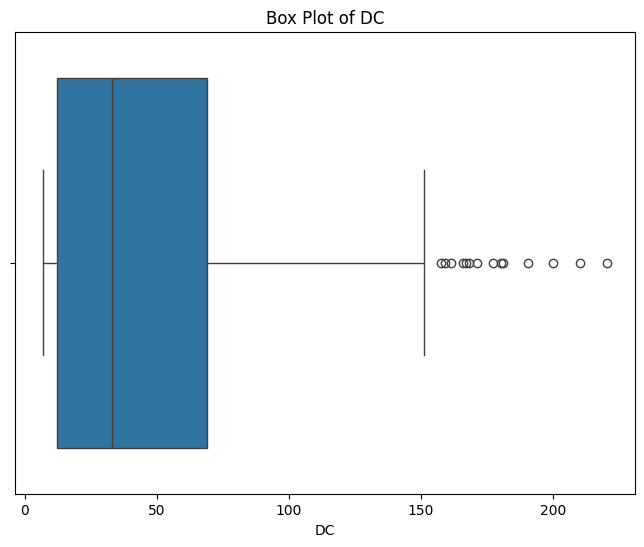

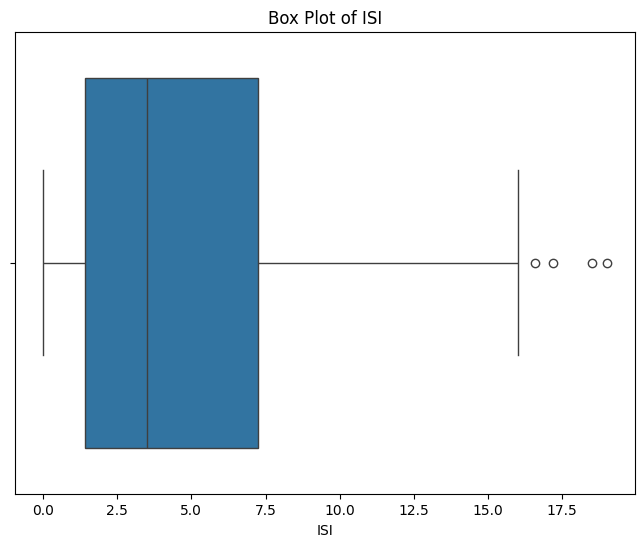

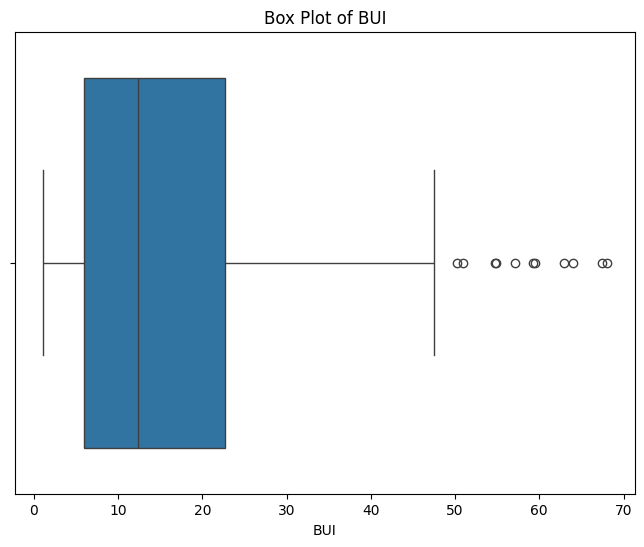

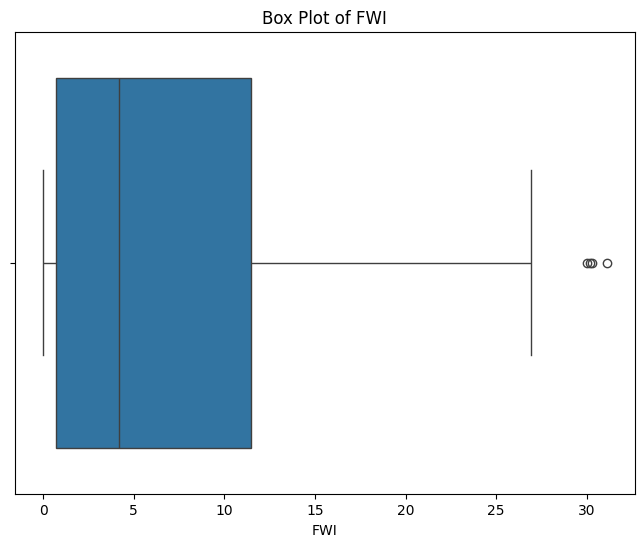

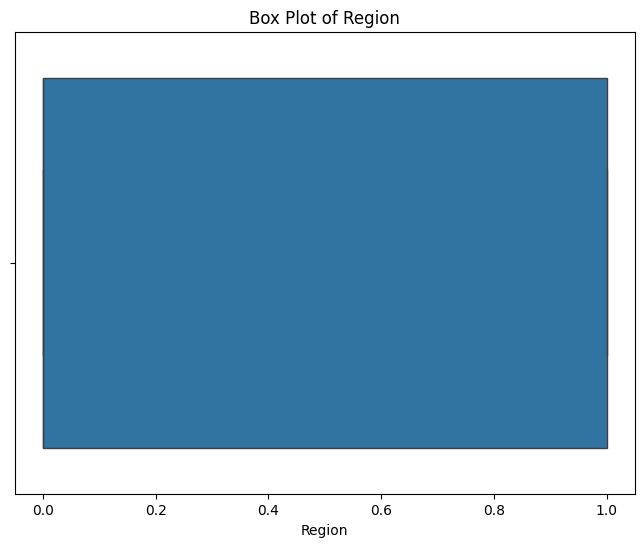

In [12]:
import matplotlib.pyplot as plt
import numpy as np
# Visualize outliers using box plots for numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[feature])
  plt.title(f'Box Plot of {feature}')
  plt.show()


Using Box plot visualization, observed presence of many outliers. Removing outliers using IQR method

In [13]:
def remove_outliers_iqr(df, feature):

  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
  return df_filtered

# Apply outlier removal to each numerical feature
for feature in numerical_features:
  df_filtered = remove_outliers_iqr(df, feature)


print(df_filtered.shape)


(243, 15)


In [14]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


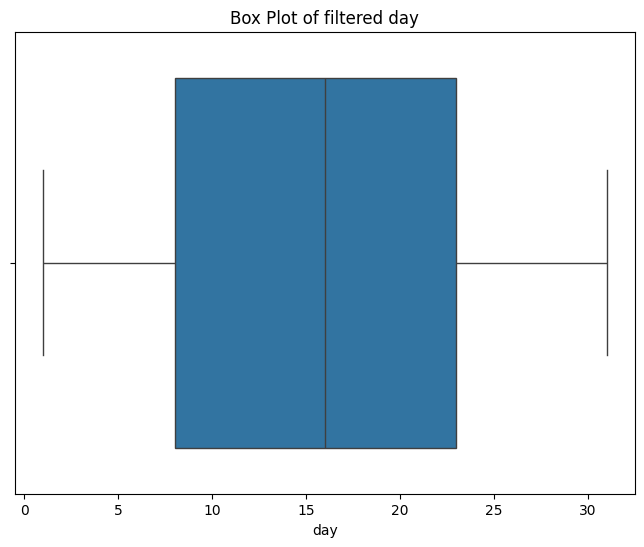

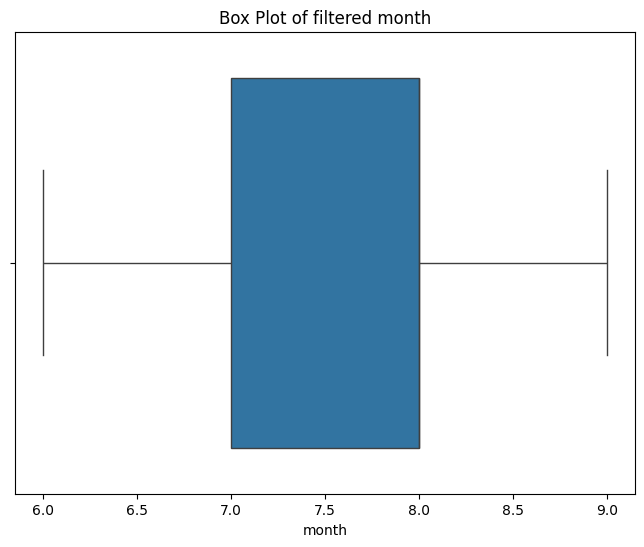

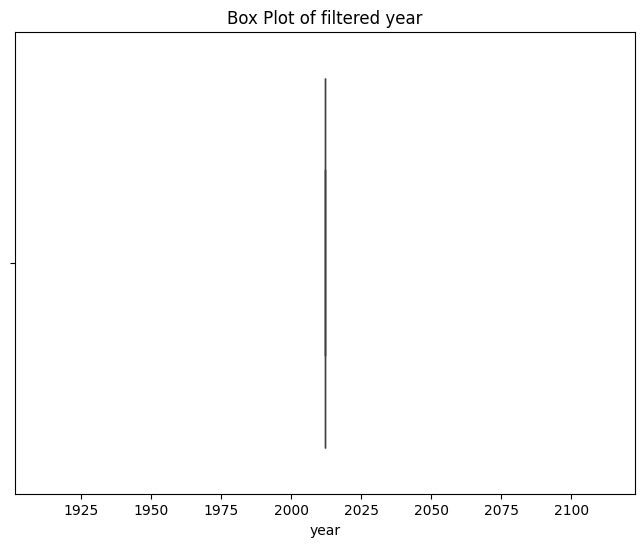

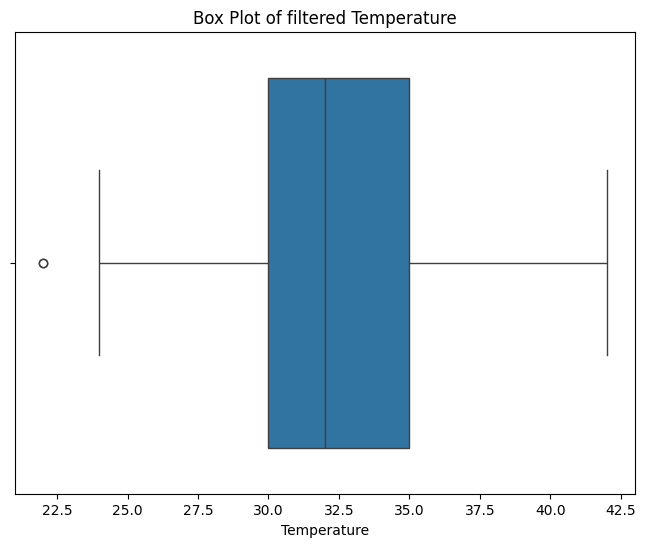

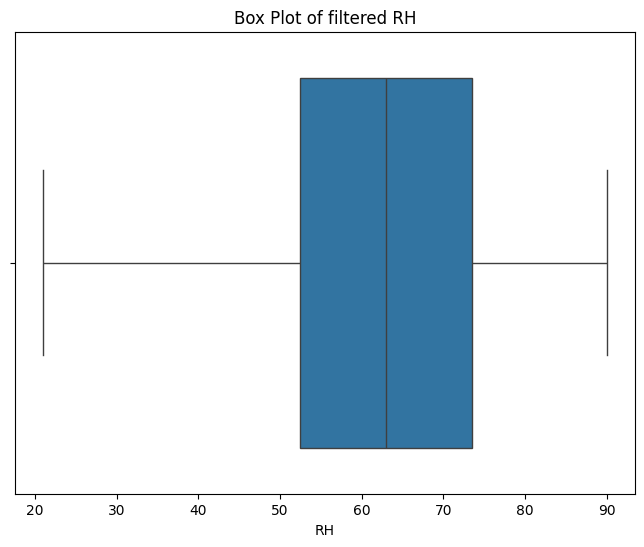

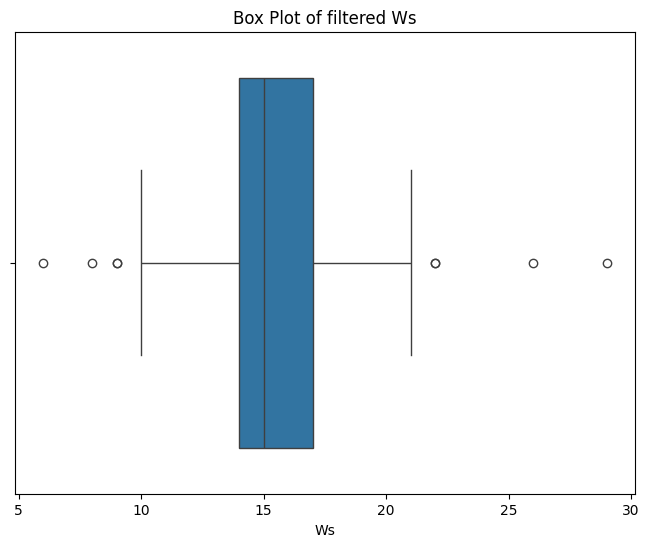

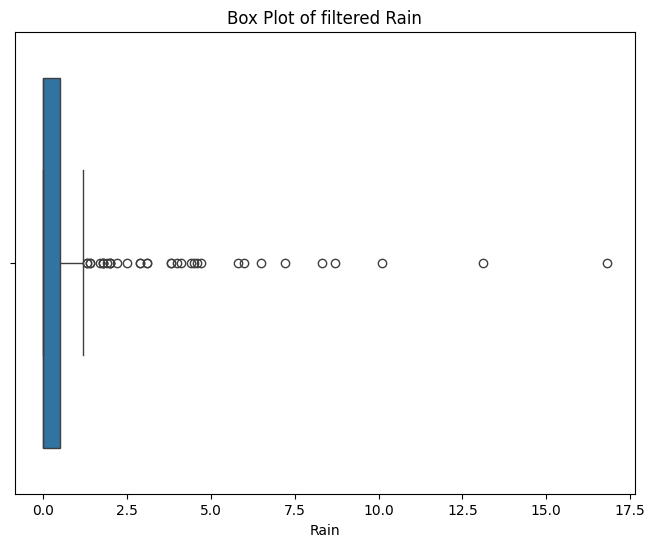

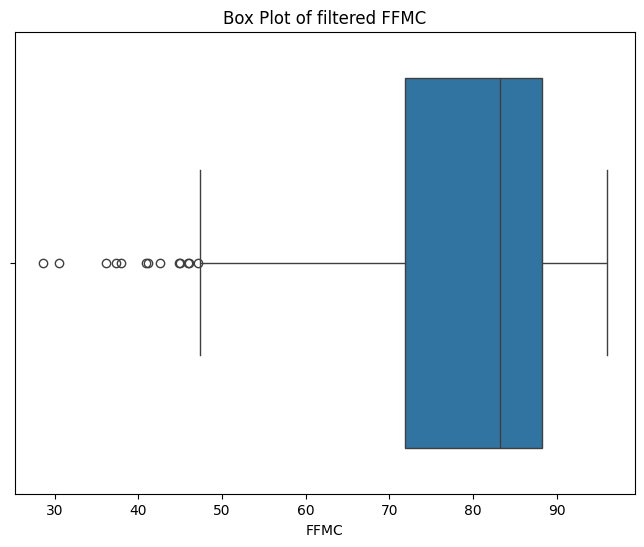

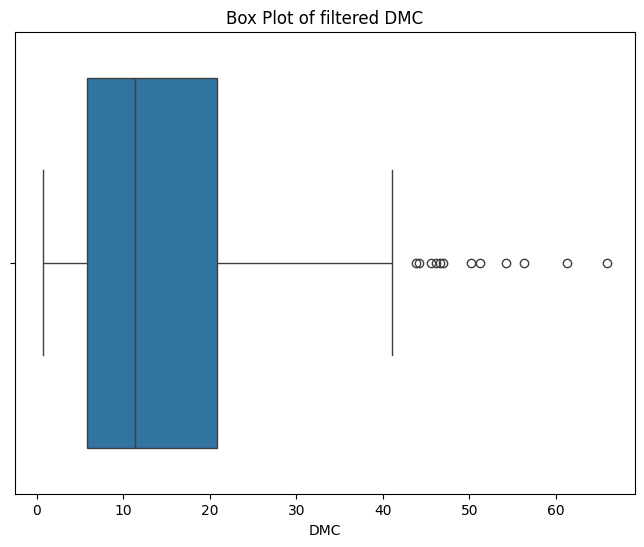

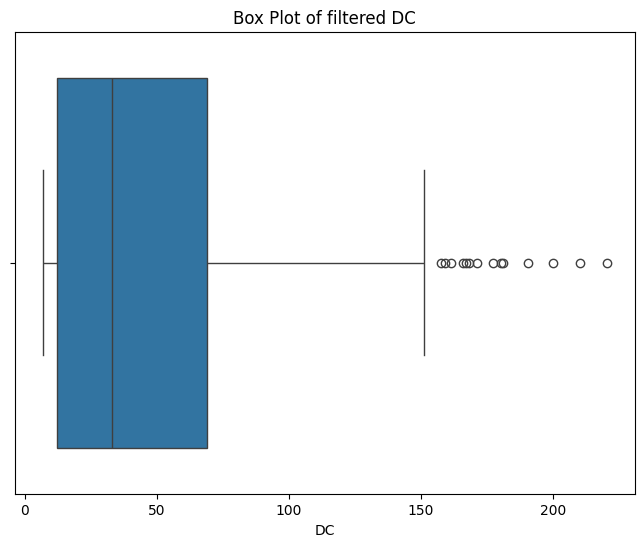

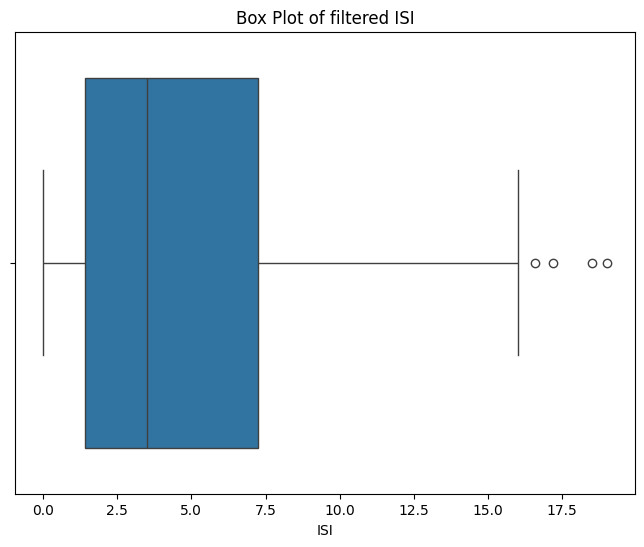

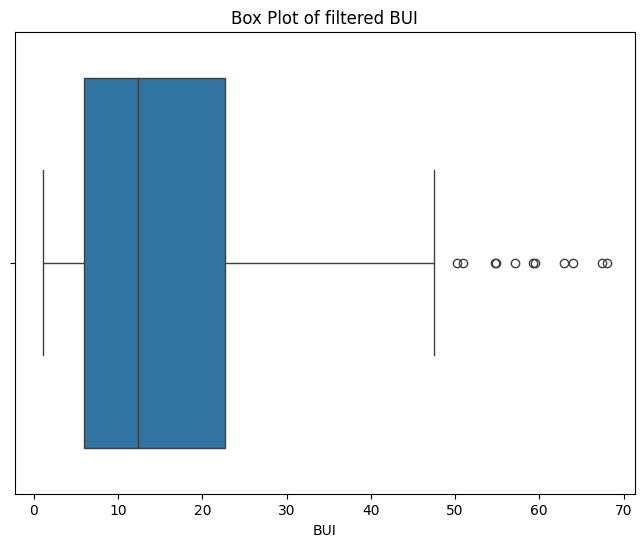

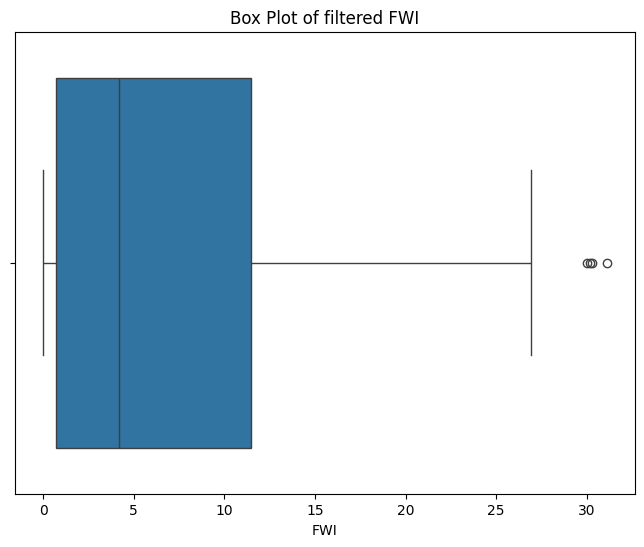

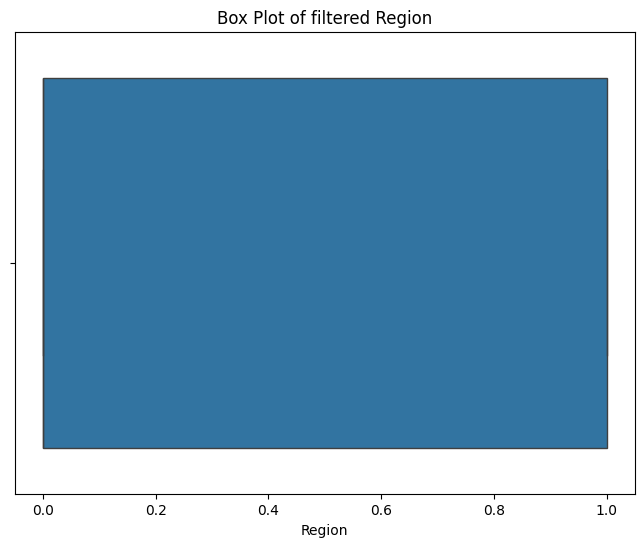

In [15]:
for feature in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df_filtered[feature])
  plt.title(f'Box Plot of filtered {feature}')
  plt.show()

Encoding target variable

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_filtered['Classes'] = le.fit_transform(df_filtered['Classes'])
df_filtered


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


Generating correlation matrix for feature engineering

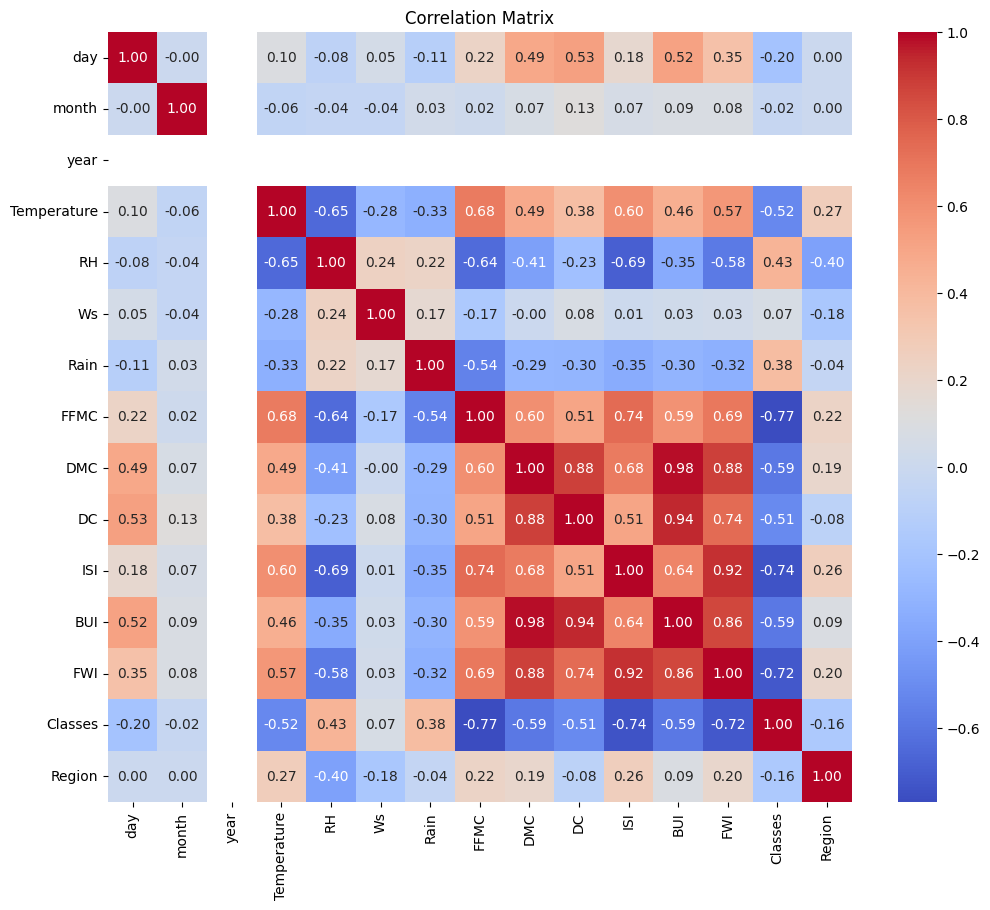

In [17]:

import matplotlib.pyplot as plt
# Correlation analysis
correlation_matrix = df_filtered.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Based on correlation analysis, the best features are temperature, FFMC, DMC, DC, ISI, BUI, FWI.

In [18]:
X = df_filtered[['Temperature','FFMC','DMC','DC','ISI','BUI','FWI']]

y = df_filtered['Classes']


Spliting the dataset into train and test dataset and scaling them using standard scaler

In [19]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X.columns = ['Temperature','FFMC','DMC','DC','ISI','BUI','FWI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
y_train.head()

,Classes
115,1
207,0
158,0
132,0
84,0


# MODEL BUILDING

Generating a logistic regression model and generating multiple evaluation metrices

In [21]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# prompt: code y_pred and y_test for r2 score

from sklearn.metrics import r2_score


# Encode the target variable (y_test and y_pred) to numerical values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)


In [22]:
# prompt: generate mse, mae, rmse metrices

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model
# Calculate the R2 score
r2 = r2_score(y_test_encoded, y_pred_encoded)
print("R2 Score:", r2)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate MSE, MAE, and RMSE
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))



R2 Score: 0.7525252525252525
Accuracy: 0.9387755102040817
MSE: 0.061224489795918366
MAE: 0.061224489795918366
RMSE: 0.24743582965269675
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        27
           1       0.91      0.95      0.93        22

    accuracy                           0.94        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.94      0.94      0.94        49

[[25  2]
 [ 1 21]]


The R² Score (0.75) indicates that 75% of the variance in the target variable is explained by the model, showing a decent fit. The Accuracy (0.94) means that 94% of the total predictions were correct. The Mean Squared Error (MSE) and Mean Absolute Error (MAE) are both low (0.061), indicating that the average errors between predicted and actual values are small. The Root Mean Squared Error (RMSE), at 0.247, provides a similar error measurement but penalizes larger errors more. For classification, the Precision is 96% for class 0 and 91% for class 1, meaning most positive predictions are correct. Recall shows that 93% of actual class 0 and 95% of actual class 1 instances were correctly identified. The F1-scores balance precision and recall, both around 0.94, confirming the model's balanced performance. The confusion matrix shows that there were 25 correct predictions for class 0, 21 for class 1, and a few misclassifications (2 for class 0, 1 for class 1).

In [23]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline for polynomial regression
degree = 2  # You can adjust the degree of the polynomial
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the polynomial regression model
model_poly.fit(X_train_scaled, y_train)

# Make predictions using the polynomial model
y_pred_poly = model_poly.predict(X_test_scaled)


# Evaluate the polynomial regression model
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression R2 Score:", r2_poly)


# You can further analyze the model's performance using other metrics like MSE or MAE.


Polynomial Regression R2 Score: -8.471274411638179


Since the r2 square metrix is negative, we will go with linear regression model saved in variable model.


In [24]:
# prompt: hyper parameter tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization type
    'solver': ['liblinear']  # Solver for logistic regression
}

# Create a logistic regression model
model = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Print the best score found
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9793522267206478
Accuracy on Test Set: 0.9795918367346939


In [28]:

import pickle

# Assuming your trained model is stored in the variable 'model'
# Save the model to a file
filename = 'best_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [29]:
loaded_model = pickle.load(open(filename, 'rb'))

# Now you can use 'loaded_model' to make predictions on new data

In [30]:
# prompt: test model in unseen data provided by user and generate output fire and not fire

import pandas as pd
def predict_fire(Temperature, FFMC, DMC, DC, ISI, BUI, FWI, model, scaler):
  """Predicts whether there is a fire based on the given features.

  Args:
    Temperature: The temperature.
    FFMC: The fine fuel moisture code.
    DMC: The duff moisture code.
    DC: The drought code.
    ISI: The initial spread index.
    BUI: The build-up index.
    FWI: The fire weather index.
    model: The trained logistic regression model.
    scaler: The scaler used for feature scaling.

  Returns:
    "Fire" if the model predicts a fire, "Not Fire" otherwise.
  """
  # Create a DataFrame with the input features
  input_data = pd.DataFrame({
      'Temperature': [Temperature],
      'FFMC': [FFMC],
      'DMC': [DMC],
      'DC': [DC],
      'ISI': [ISI],
      'BUI': [BUI],
      'FWI': [FWI]
  })

  # Scale the input features
  scaled_input_data = scaler.transform(input_data)

  # Make a prediction using the model
  prediction = loaded_model.predict(scaled_input_data)

  # Return the prediction
  if prediction[0] == 1:
    return "Fire"
  else:
    return "Not Fire"


# Get user input for the features
print(""" Temperature: The temperature.\n
    FFMC: The fine fuel moisture code.\n
    DMC: The duff moisture code.\n
    DC: The drought code.\n
    ISI: The initial spread index.\n
    BUI: The build-up index.\n
    FWI: The fire weather index.""")
Temperature = float(input("Enter Temperature: "))
FFMC = float(input("Enter FFMC: "))
DMC = float(input("Enter DMC: "))
DC = float(input("Enter DC: "))
ISI = float(input("Enter ISI: "))
BUI = float(input("Enter BUI: "))
FWI = float(input("Enter FWI: "))

# Make a prediction using the trained model
prediction = predict_fire(Temperature, FFMC, DMC, DC, ISI, BUI, FWI, best_model, scaler)

# Print the prediction
print("Prediction:", prediction)


 Temperature: The temperature.

    FFMC: The fine fuel moisture code.

    DMC: The duff moisture code.

    DC: The drought code.

    ISI: The initial spread index.

    BUI: The build-up index.

    FWI: The fire weather index.
Enter Temperature: 45
Enter FFMC: 65
Enter DMC: 4.5
Enter DC: 2.3
Enter ISI: 5.2
Enter BUI: 3.4
Enter FWI: 0.4
Prediction: Fire
